# Exprience Analysis

In [31]:
import os
import sys
sys.path.append(os.path.abspath('../src'))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from transform_data import transform_and_save_data

In [5]:
query = "select * from cleaned_xdr_data;"
df = transform_and_save_data(query)
df.tail(5)

c:\Users\Hp\Desktop\Kifiya\Week 2\TellCo’s Growth Analysis\scripts\load_data.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming Data (Mb),Netflix Data (Mb),Google Data (Mb),Other Data (Mb),Total Data (Mb),Avg Bearer TP (Mbps),Avg RTT (sec),TCP Retrans. Vol (Bytes),TCP Retrans. Vol (Mb),Date
149996,7.277826e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,510.985260,35.821785,12.192644,15.975882,602.535353,0.114258,0.032000,2.156957e+07,20.570348,2019-04-29
149997,7.349883e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,602.367492,38.760466,4.210816,681.532044,673.088002,0.075195,0.029000,2.156957e+07,20.570348,2019-04-29
149998,1.311448e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,540.670204,14.333441,6.280393,126.281343,598.620061,0.087891,0.049000,2.156957e+07,20.570348,2019-04-29
149999,1.311448e+19,2019-04-29 07:28:00,696.0,2019-04-30 10:40:00,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,338.617750,15.730707,7.397906,778.312724,382.921234,0.069336,0.042000,2.156957e+07,20.570348,2019-04-29
150000,-1.000000e+00,1900-01-01 00:00:00,-1.0,1900-01-01 00:00:00,-1.0,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,Unknown,...,410.397626,21.580321,7.445616,409.474701,-0.000002,-0.001953,0.127459,2.156957e+07,20.570348,1900-01-01


In [30]:
df_filtered = df[df['MSISDN/Number'] != -1]

In [7]:
agg_df = df_filtered.groupby('MSISDN/Number').agg({
    'TCP Retrans. Vol (Mb)': 'mean',
    'Avg RTT (sec)': 'mean',
    'Avg Bearer TP (Mbps)': 'mean',
    'Handset Type': 'first'  # Most frequent handset type
}).reset_index()

# Display the first few rows of the aggregated data
agg_df.head()

,MSISDN/Number,TCP Retrans. Vol (Mb),Avg RTT (sec),Avg Bearer TP (Mbps),Handset Type
0,3.360100e+10,20.570348,0.046000,0.074219,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,20.570348,0.031000,0.096680,Apple iPhone 7 (A1778)
2,3.360100e+10,20.570348,0.127459,0.094727,undefined
3,3.360101e+10,0.002479,0.084000,0.242188,Apple iPhone 5S (A1457)
4,3.360101e+10,14.753535,0.059500,27.755859,Apple iPhone Se (A1723)


In [8]:
''' # Plot average RTT per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Handset Type', y='Avg RTT (sec)', data=df)
plt.xticks(rotation=90)
plt.title('Average RTT per Handset Type')
plt.show()

# Plot average throughput per handset type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Handset Type', y='Avg Bearer TP (Mbps)', data=df)
plt.xticks(rotation=90)
plt.title('Average Throughput per Handset Type')
plt.show()  
'''

" # Plot average RTT per handset type\nplt.figure(figsize=(10, 6))\nsns.boxplot(x='Handset Type', y='Avg RTT (sec)', data=df)\nplt.xticks(rotation=90)\nplt.title('Average RTT per Handset Type')\nplt.show()\n\n# Plot average throughput per handset type\nplt.figure(figsize=(10, 6))\nsns.boxplot(x='Handset Type', y='Avg Bearer TP (Mbps)', data=df)\nplt.xticks(rotation=90)\nplt.title('Average Throughput per Handset Type')\nplt.show()  \n"

#### Step 2: Compute Top, Bottom, and Most Frequent TCP Values

In [9]:
# Top 10 TCP values
top_tcp = agg_df['TCP Retrans. Vol (Mb)'].nlargest(10)

# Bottom 10 TCP values 
bottom_tcp = agg_df['TCP Retrans. Vol (Mb)'].nsmallest(10)

## Most frequent tcp values 
most_frequent_tcp = agg_df['TCP Retrans. Vol (Mb)'].mode()

# Display the results
print("Top 10 TCP values:\n", top_tcp)
print("\nBottom 10 TCP values:\n", bottom_tcp)
print("\nMost frequent 10 TCP values:\n", most_frequent_tcp[0])

Top 10 TCP values:
 85785    4102.208556
32273    4089.470730
58026    4070.899343
31942    4057.559627
62049    4016.168422
70079    3973.574613
43629    3946.244943
48341    3927.044843
64113    3784.294697
98211    3611.441548
Name: TCP Retrans. Vol (Mb), dtype: float64

Bottom 10 TCP values:
 23472     0.000093
6359      0.000122
96977     0.000123
13546     0.000128
2177      0.000136
25863     0.000168
102198    0.000168
105775    0.000169
78100     0.000171
89395     0.000174
Name: TCP Retrans. Vol (Mb), dtype: float64

Most frequent 10 TCP values:
 20.570347724106785


#### Step 3: Compute Top, Bottom, and Most Frequent RTT Values

In [10]:
# Top 10 RTT values
top_rtt = df_filtered['Avg RTT (sec)'].nlargest(10)

# Bottom 10 RTT values
bottom_rtt = df_filtered['Avg RTT (sec)'].nsmallest(10)

# Most frequent 10 RTT values
most_frequent_rtt = df_filtered['Avg RTT (sec)'].mode()

# Display the results
print("Top 10 RTT values:\n", top_rtt)
print("\nBottom 10 RTT values:\n", bottom_rtt)
print("\nMost frequent 10 RTT values:\n", most_frequent_rtt[0])

Top 10 RTT values:
 30166     96.924
29927     64.641
5989      54.848
22851     27.278
23455     26.300
1373      25.922
81274     25.715
97321     25.388
100584    24.738
97915     20.980
Name: Avg RTT (sec), dtype: float64

Bottom 10 RTT values:
 42612     0.000
103328    0.000
124544    0.000
143878    0.000
71739     0.002
50974     0.004
144923    0.004
103549    0.005
8778      0.006
123219    0.006
Name: Avg RTT (sec), dtype: float64

Most frequent 10 RTT values:
 0.12745858896466059


#### Step 4: Compute Top, Bottom, and Most Frequent Throughput Values

In [11]:
# Top 10 Throughput values
top_throughput = df_filtered['Avg Bearer TP (Mbps)'].nlargest(10)

# Bottom 10 Throughput values
bottom_throughput = df_filtered['Avg Bearer TP (Mbps)'].nsmallest(10)

# Most frequent 10 Throughput values
most_frequent_throughput = df_filtered['Avg Bearer TP (Mbps)'].mode()

# Display the results
print("Top 10 Throughput values:\n", top_throughput)
print("\nBottom 10 Throughput values:\n", bottom_throughput)
print("\nMost frequent 10 Throughput values:\n", most_frequent_throughput[0])

Top 10 Throughput values:
 120890    373.302734
143670    305.902344
141263    297.166992
91313     293.501953
116807    277.276367
141458    274.554688
149617    270.656250
92193     269.731445
116565    267.628906
117791    263.562500
Name: Avg Bearer TP (Mbps), dtype: float64

Bottom 10 Throughput values:
 149     0.0
364     0.0
618     0.0
756     0.0
1818    0.0
2489    0.0
3935    0.0
4166    0.0
4853    0.0
5821    0.0
Name: Avg Bearer TP (Mbps), dtype: float64

Most frequent 10 Throughput values:
 0.0615234375


#### Step 5: Average Throughput by Handset Type

In [46]:
import plotly.express as px
top_10_handsets = df_filtered['Handset Type'].value_counts().head(10)
top_10_throughput = df_filtered[df_filtered['Handset Type'].isin(top_10_handsets.index)]
# Group by 'Handset Type' and calculate the mean
avg_throughput = top_10_throughput.groupby('Handset Type')['Avg Bearer TP (Mbps)'].mean().reset_index()

# Sort the DataFrame by 'Avg Bearer TP (Mbps)' in descending order
avg_throughput = avg_throughput.sort_values(by='Avg Bearer TP (Mbps)', ascending=False)

# Create the bar chart
fig = px.bar(avg_throughput, x='Handset Type', y='Avg Bearer TP (Mbps)', 
             title='Average Throughput by Handset Type',
             template='plotly_white',
             text='Avg Bearer TP (Mbps)',
             hover_name='Handset Type',
             hover_data=['Avg Bearer TP (Mbps)'],
             height=600, width=800,
            )

# Update layout and labels
fig.update_layout(xaxis_tickangle=-30, yaxis_title='Average Throughput (Mbps)',
                  xaxis_title='Handset Type')

# Update traces for better text display
fig.update_traces(texttemplate='%{text:.2f}', textposition='auto')

# Consider using a linear scale for better readability
fig.update_yaxes(type='linear')

# Show the figure
fig.show()

#### Step 6: Average retransmission by Handset Type

In [48]:
top_10_handsets = df_filtered['Handset Type'].value_counts().head(10)
top_10_retransmission = df_filtered[df_filtered['Handset Type'].isin(top_10_handsets.index)]
avg_tcp_retransmission = top_10_retransmission.groupby('Handset Type')['TCP Retrans. Vol (Mb)'].mean().reset_index()
avg_tcp_retransmission = avg_tcp_retransmission.sort_values(by='TCP Retrans. Vol (Mb)', ascending=False)
fig = px.bar(avg_tcp_retransmission, x='Handset Type', y='TCP Retrans. Vol (Mb)',
             title='Average TCP Retransmission Volume per Handset Type',
             labels={'Handset Type': 'Handset Type', 'TCP Retrans. Vol (Mb)': 'Average TCP Retransmission'},
             text='TCP Retrans. Vol (Mb)',
             barmode='group',
             hover_name='Handset Type',
             width=800, height=600,
             template='plotly_white',)
#Customize the layout 
fig.update_layout(xaxis_tickangle=-30, yaxis_title='Average TCP Retransmission', 
                  xaxis_title='Handset Type')
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto')

fig.update_yaxes(type='log')
# show the plot 
fig.show()

#### Step 7: K-means Clustering 

Cluster Centers:
   Avg Bearer TP (Mbps)  TCP Retrans. Vol (Mb)  Cluster
0              4.091796              16.268062        1
1             60.447898              15.024935        2
2             21.650416            1806.003500        3


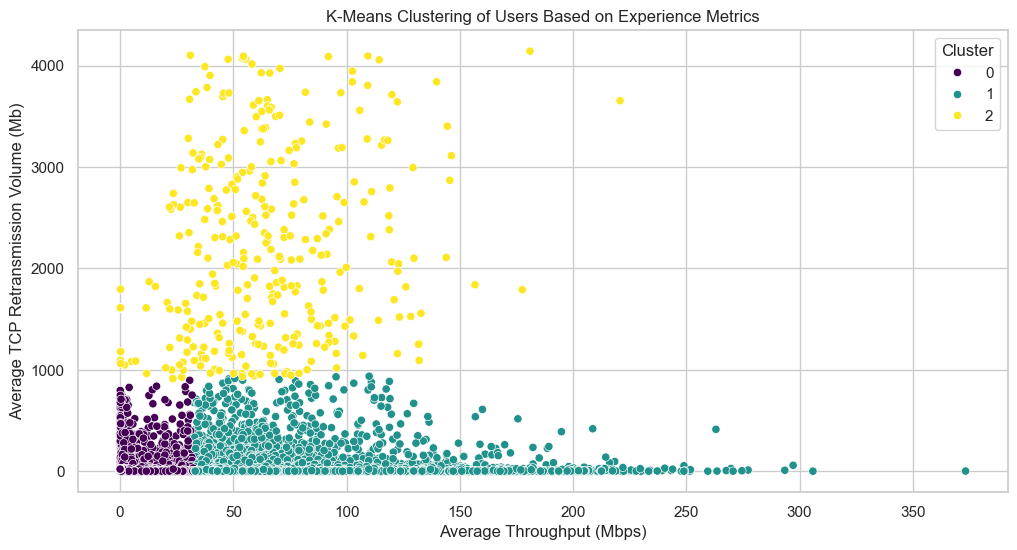

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data
data = df[['Avg Bearer TP (Mbps)', 'TCP Retrans. Vol (Mb)']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Avg Bearer TP (Mbps)', 'TCP Retrans. Vol (Mb)'])
cluster_centers_df['Cluster'] = range(1, 4)

print("Cluster Centers:")
print(cluster_centers_df)

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Avg Bearer TP (Mbps)', y='TCP Retrans. Vol (Mb)', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Users Based on Experience Metrics')
plt.xlabel('Average Throughput (Mbps)')
plt.ylabel('Average TCP Retransmission Volume (Mb)')
plt.show()

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Extract the features for clustering
X = agg_df[['Avg Bearer TP (Mbps)', 'TCP Retrans. Vol (Mb)']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max normalization to the features
X_normalized = scaler.fit_transform(X)

# Initialize the KMeans model with k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the normalized data
kmeans.fit(X_normalized)

# Add the cluster labels to the DataFrame
agg_df['Experience Score'] = kmeans.labels_

# Define labels for the experience groups
experience_labels = {0: 'Bad Experience', 1: 'Normal Experience', 2: 'Good Experience'}

# Map cluster labels to experience groups
agg_df['Experience Group'] = agg_df['Experience Score'].map(experience_labels)
# Display the clustered experience metrics
experience_group_count = agg_df['Experience Group'].value_counts()
experience_group_percentage = agg_df['Experience Group'].value_counts(normalize=True) * 100
print('Experience Group Count')
print(experience_group_count)

print("\nprint Expereince Group Percenage:")
print(experience_group_percentage)

Experience Group Count
Experience Group
Normal Experience    79891
Bad Experience       21288
Good Experience       5677
Name: count, dtype: int64

print Expereince Group Percenage:
Experience Group
Normal Experience    74.765104
Bad Experience       19.922138
Good Experience       5.312757
Name: proportion, dtype: float64


In [54]:
# Create a count plot for 'Experience Group'
fig = px.histogram(agg_df, x='Experience Group', color='Experience Group', 
                   title='Count of Experience Group', 
                   color_discrete_sequence=px.colors.sequential.Viridis)

# Update layout for better readability
fig.update_layout(xaxis_title='Experience Group', yaxis_title='Count', 
                  template='plotly_white', showlegend=False)

fig.show()

In [82]:
import plotly.graph_objects as go

# Create a pie chart for the percentage of each experience group
fig = go.Figure(data=[go.Pie(labels=experience_group_percentage.index, 
                             values=experience_group_percentage.values, 
                             textinfo='label+percent', 
                             insidetextorientation='radial',
                             marker=dict(colors=px.colors.sequential.Viridis))],)

# Update layout for better readability
fig.update_layout(title='Percentage of Experience Groups', showlegend=False)
fig.update_traces(textposition='inside', hoverinfo='none')
fig.show()